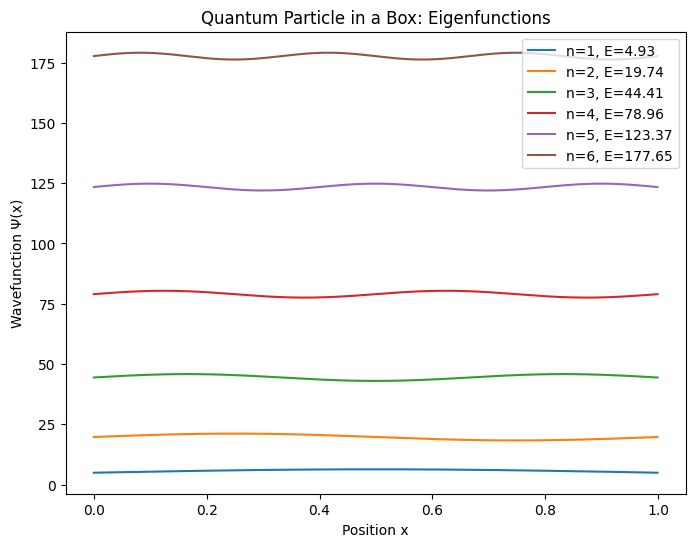

In [1]:
"""
Quantum Mechanical Particle in a Box - Numerical Solution

This script builds up step by step, following a lecture-style approach.
We start with the fundamental concepts and move toward solving
 the problem numerically using the finite difference method.

Key Steps:
1. Solve the time-independent Schrödinger equation using numerical integration.
2. Identify energy eigenvalues through an analytical formula.
3. Normalize wavefunctions to ensure proper probability interpretation.
4. Plot the eigenfunctions to visualize the quantum states.
"""

import numpy as np
import matplotlib.pyplot as plt

# Fundamental Constants (Arbitrary Units)
"""
We set fundamental constants like h_bar (reduced Planck’s constant) to 1
for simplicity in numerical calculations. This avoids unnecessary unit conversions
and makes equations dimensionless, a common practice in theoretical physics.
Physical units can be reintroduced later if needed.
"""
h_bar = 1  # Reduced Planck's constant
m = 1      # Mass of the particle
a = 1      # Width of the box
V = 0      # Potential inside the box; infinite outside

# --- Step 1: Understanding the Schrödinger Equation Numerically ---
# We solve the time-independent Schrödinger equation using finite differences.

def solve_wavefunction(E, dx):
    """
    Numerically integrates the Schrödinger equation to find the wavefunction Ψ(x).
    
    Parameters:
        E (float): The energy value to evaluate the wavefunction.
        dx (float): Step size for numerical integration.
    
    Returns:
        np.ndarray: Array of position values x.
        np.ndarray: Corresponding wavefunction values Ψ(x).
    """
    psi = 0         # Initial wavefunction value (assumed at x=0)
    d_psi = 1       # Initial derivative (arbitrary nonzero value to start integration)
    x = 0           # Start of the box
    x_values = []
    psi_values = []
    
    while x <= a:
        dd_psi = (2 * m / h_bar**2) * (V - E) * psi  # Compute second derivative
        d_psi += dd_psi * dx  # Update first derivative
        psi += d_psi * dx  # Update wavefunction value
        
        x_values.append(x)
        psi_values.append(psi)
        x += dx  # Increment position
    
    return np.array(x_values), np.array(psi_values)

# --- Step 2: Finding Energy Eigenvalues ---
def find_eigenvalues(n_max=5, dx=0.001):
    """
    Computes the first n_max energy eigenvalues and corresponding wavefunctions.
    
    Uses the analytical solution for energy levels of a quantum particle in a box:
        E_n = (n² * π² * h_bar²) / (2 * m * a²)
    
    Parameters:
        n_max (int): Number of energy levels to compute.
        dx (float): Step size for numerical wavefunction computation.
    
    Returns:
        list: Computed eigenvalues.
        list: List of eigenfunction arrays.
        list: Corresponding position arrays.
    """
    eigenvalues = []
    eigenfunctions = []
    eigenfunctions_x = []
    
    for n in range(1, n_max + 1):
        E = (np.pi**2 * h_bar**2 * n**2) / (2 * m * a**2)  # Analytical energy levels
        x_vals, psi_vals = solve_wavefunction(E, dx)
        eigenvalues.append(E)
        eigenfunctions.append(psi_vals)
        eigenfunctions_x.append(x_vals)
    
    return eigenvalues, eigenfunctions, eigenfunctions_x

# --- Step 3: Normalizing Eigenfunctions ---
def normalize_wavefunctions(eigenfunctions, dx):
    """
    Normalizes each eigenfunction so that the total probability is 1.
    
    Parameters:
        eigenfunctions (list): List of computed wavefunctions.
        dx (float): Step size for numerical integration.
    
    Returns:
        list: Normalized eigenfunctions.
    """
    for i in range(len(eigenfunctions)):
        norm = np.sqrt(np.dot(eigenfunctions[i], eigenfunctions[i]) * dx)
        eigenfunctions[i] /= norm  # Normalize wavefunction
    return eigenfunctions

# --- Step 4: Plotting the Eigenfunctions ---
def plot_eigenfunctions(eigenvalues, eigenfunctions, x_values, shift=True):
    """
    Plots the first few normalized eigenfunctions.
    
    If shift=True, the eigenfunctions are offset by their corresponding energy levels
    to improve visualization.
    
    Parameters:
        eigenvalues (list): List of energy eigenvalues.
        eigenfunctions (list): List of normalized eigenfunctions.
        x_values (list): Corresponding x values for each wavefunction.
        shift (bool): Whether to shift the eigenfunctions by their energy values.
    """
    plt.figure(figsize=(8, 6))
    
    for i in range(len(eigenvalues)):
        psi_plot = eigenfunctions[i] + (eigenvalues[i] if shift else 0)
        plt.plot(x_values[i], psi_plot, label=f'n={i+1}, E={eigenvalues[i]:.2f}')
    
    plt.xlabel("Position x")
    plt.ylabel("Wavefunction Ψ(x)")
    plt.title("Quantum Particle in a Box: Eigenfunctions")
    plt.legend()
    plt.show()

# --- Run the Simulation ---
n_max = 6  # Number of energy levels to compute
eigenvalues, eigenfunctions, eigenfunctions_x = find_eigenvalues(n_max)
eigenfunctions = normalize_wavefunctions(eigenfunctions, dx=0.001)
plot_eigenfunctions(eigenvalues, eigenfunctions, eigenfunctions_x)
